In [1]:
# Import Matplotlib, Seaborn, and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read the CSV file.
fitness = pd.read_csv('daily_activity.csv')

# View the DataFrame.
print(fitness.shape)
print(fitness.dtypes)
print(fitness.columns)
fitness.head()

(940, 15)
Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
# Define single_day as variable.
single_day = fitness[fitness['ActivityDate'] == '4/12/2016']

# View the output.
print(single_day.shape)

(33, 15)


<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

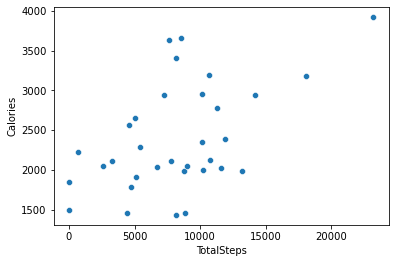

In [4]:
# Create a scatterplot.
sns.scatterplot(x='TotalSteps', y='Calories', data=single_day)

In [6]:
# Make a copy of original data.
single_day_highlights = single_day.copy()

# View the output.
print(single_day_highlights.shape)

(33, 15)


In [7]:
# Set a criteria as true or false.
single_day_highlights['High Activity'] = single_day_highlights['TotalSteps'] > 15000

<AxesSubplot:xlabel='TotalSteps', ylabel='Calories'>

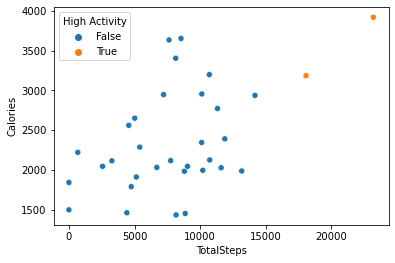

In [8]:
# Create new scatterplot.
sns.scatterplot(x='TotalSteps', y='Calories', 
                hue='High Activity', data=single_day_highlights)

In [9]:
# Define data = steps_time_series.
steps_time_series = fitness\
 .groupby('ActivityDate')[['TotalSteps']]\
 .sum()\
 .reset_index()\
 .copy()

In [10]:
# Create a variable.
steps_time_series['ActivityDate'] = pd.to_datetime(steps_time_series['ActivityDate'])

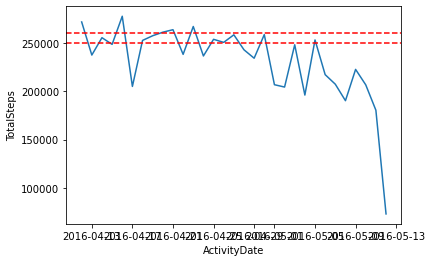

In [13]:
# Create a lineplot.
sns.lineplot(x='ActivityDate', y='TotalSteps', data=steps_time_series)

# Add annotation lines.
plt.axhline(y=250000, color='r', linestyle='--')
plt.axhline(y=260000, color='r', linestyle='--')